In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from GradientBoostingTree import CustomGradientBoostingRegressor  # Import the custom model

# Multiple types of data generating functions
def generate_linear_data(n_samples=100, noise=0.1):
    X = np.random.rand(n_samples, 1) * 10
    y = 5 * X.squeeze() + np.random.randn(n_samples) * noise
    return X, y

def handle_missing_data(X):
    X = pd.DataFrame(X)
    X = X.fillna(X.mean())
    return X.values

def generate_polynomial_data(n_samples=100, noise=0.1):
    X = np.random.rand(n_samples, 1) * 10
    y = 0.5 * X.squeeze()**2 + 3 * X.squeeze() + np.random.randn(n_samples) * noise
    return X, y

def generate_noisy_data(n_samples=100, noise=5):
    X = np.random.rand(n_samples, 1) * 10
    y = 2 * X.squeeze() + 3 + np.random.randn(n_samples) * noise
    return X, y

def generate_missing_data(n_samples=100):
    X = np.random.rand(n_samples, 1) * 10
    y = 3 * X.squeeze() + 7
    X[np.random.choice(n_samples, size=10), 0] = np.nan  # Introduce NaNs
    return X, y

# Custom train-test split function
def custom_train_test_split(X, y, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    n_samples = X.shape[0]
    indices = np.arange(n_samples)
    np.random.shuffle(indices)

    split_index = int(n_samples * (1 - test_size))
    train_indices = indices[:split_index]
    test_indices = indices[split_index:]

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test


#Method for evaluating both custom and SK learn models
def evaluate_model(custom_model, sklearn_model, X_test, y_test):
    # Custom model predictions
    y_pred_custom = custom_model.predict(X_test)
    mse_custom = mean_squared_error(y_test, y_pred_custom)
    r2_custom = r2_score(y_test, y_pred_custom)

    # Sklearn model predictions
    y_pred_sklearn = sklearn_model.predict(X_test)
    mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
    r2_sklearn = r2_score(y_test, y_pred_sklearn)

    # Scatter plots for comparison
    plt.figure(figsize=(12, 6))

    # Custom model plot
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred_custom, color='blue', alpha=0.7, label='Custom Predictions')
    plt.plot(y_test, y_test, color='black', linestyle='--', label='Ideal Line (y=x)')
    plt.title("Custom Model: True vs Predicted")
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.legend()
    plt.grid()

    # Sklearn model plot
    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_pred_sklearn, color='green', alpha=0.7, label='Sklearn Predictions')
    plt.plot(y_test, y_test, color='black', linestyle='--', label='Ideal Line (y=x)')
    plt.title("Sklearn Model: True vs Predicted")
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

    # Results
    print("\nCustom Model Performance:")
    print(f"Mean Squared Error: {mse_custom:.4f}")
    print(f"R-Squared: {r2_custom:.4f}")

    print("\nSklearn Model Performance:")
    print(f"Mean Squared Error: {mse_sklearn:.4f}")
    print(f"R-Squared: {r2_sklearn:.4f}")

    # Residuals Plot for Custom Model
    plt.figure(figsize=(12, 6))
    plt.scatter(X_test, y_test - custom_model.predict(X_test), color="red", alpha=0.6, label="Custom Model Residuals")
    plt.axhline(0, color="black", linestyle="--")
    plt.title("Residuals Plot - Custom Model")
    plt.xlabel("Feature X (Test Data)")
    plt.ylabel("Residuals (True - Predicted)")
    plt.legend()
    plt.grid()
    plt.show()

    # Residuals Plot for Sklearn Model
    plt.figure(figsize=(12, 6))
    plt.scatter(X_test, y_test - sklearn_model.predict(X_test), color="purple", alpha=0.6, label="Sklearn Model Residuals")
    plt.axhline(0, color="black", linestyle="--")
    plt.title("Residuals Plot - Sklearn Model")
    plt.xlabel("Feature X (Test Data)")
    plt.ylabel("Residuals (True - Predicted)")
    plt.legend()
    plt.grid()
    plt.show()


    # Combined summary comparison
    print("Analysis:")
    if mse_custom < mse_sklearn and r2_custom > r2_sklearn:
        print("The custom model performed better!")
    elif mse_sklearn < mse_custom and r2_sklearn > r2_custom:
        print("The Scikit-learn model performed better!")
    else:
        print("Both models performed similarly with slight differences.")




## Test-1 
- Testing both the custom and SKlearn model on Generated data and comparing the it's evaluations

Iteration 1/100, Loss: 153.8706
Iteration 2/100, Loss: 125.5954
Iteration 3/100, Loss: 102.5517
Iteration 4/100, Loss: 83.8278
Iteration 5/100, Loss: 68.5453
Iteration 6/100, Loss: 56.1805
Iteration 7/100, Loss: 46.0846
Iteration 8/100, Loss: 37.9147
Iteration 9/100, Loss: 31.2559
Iteration 10/100, Loss: 25.8514
Iteration 11/100, Loss: 21.4720
Iteration 12/100, Loss: 17.8970
Iteration 13/100, Loss: 14.9824
Iteration 14/100, Loss: 12.6188
Iteration 15/100, Loss: 10.6983
Iteration 16/100, Loss: 9.1259
Iteration 17/100, Loss: 7.8571
Iteration 18/100, Loss: 6.8158
Iteration 19/100, Loss: 5.9717
Iteration 20/100, Loss: 5.2845
Iteration 21/100, Loss: 4.7216
Iteration 22/100, Loss: 4.2636
Iteration 23/100, Loss: 3.8894
Iteration 24/100, Loss: 3.5838
Iteration 25/100, Loss: 3.3302
Iteration 26/100, Loss: 3.1255
Iteration 27/100, Loss: 2.9496
Iteration 28/100, Loss: 2.8052
Iteration 29/100, Loss: 2.6796
Iteration 30/100, Loss: 2.5598
Iteration 31/100, Loss: 2.4748
Iteration 32/100, Loss: 2.3750

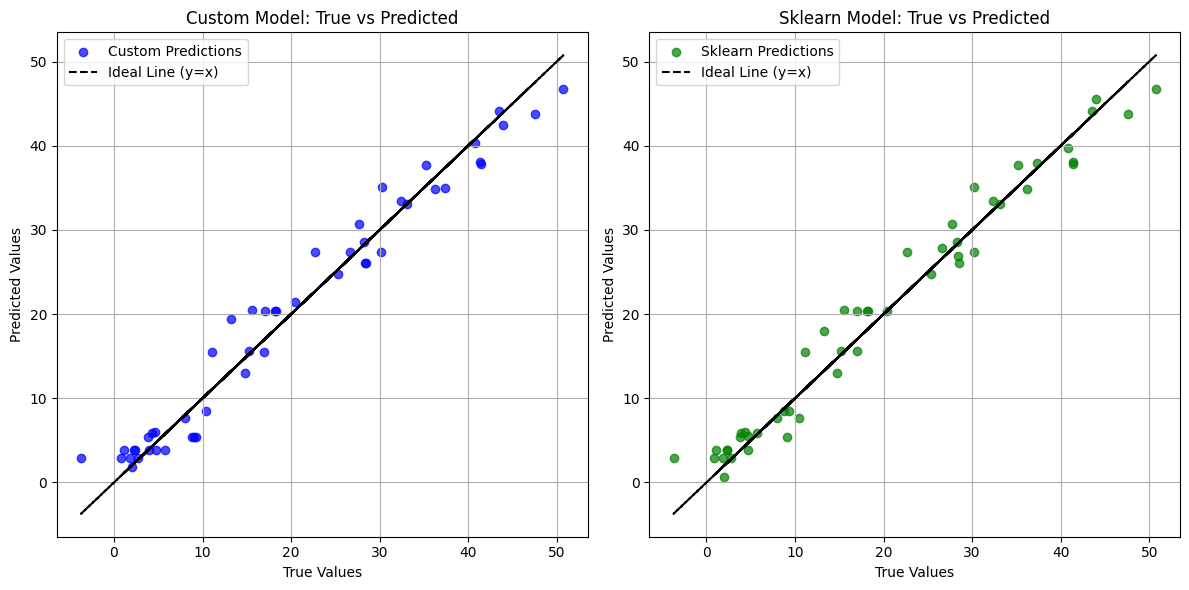


Custom Model Performance:
Mean Squared Error: 7.4155
R-Squared: 0.9662

Sklearn Model Performance:
Mean Squared Error: 6.5688
R-Squared: 0.9700


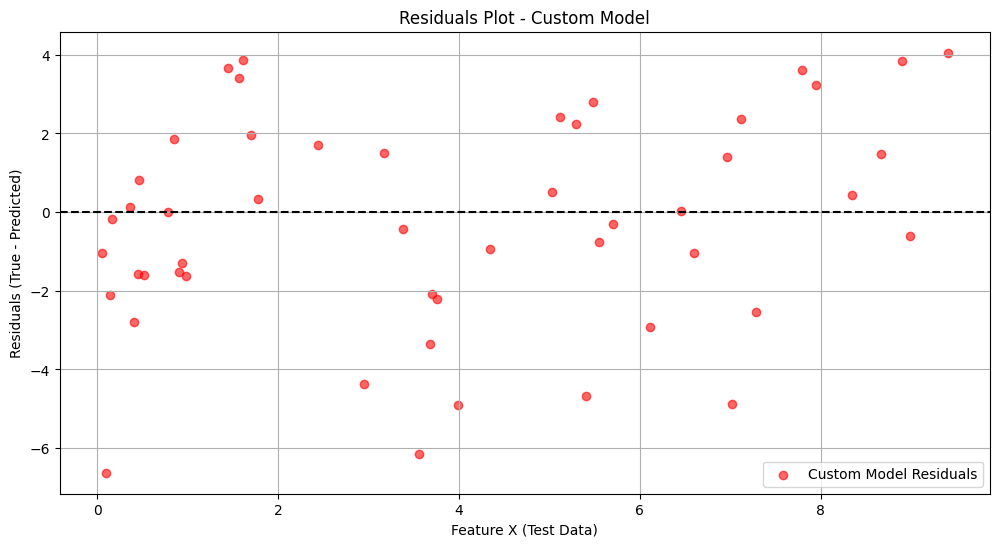

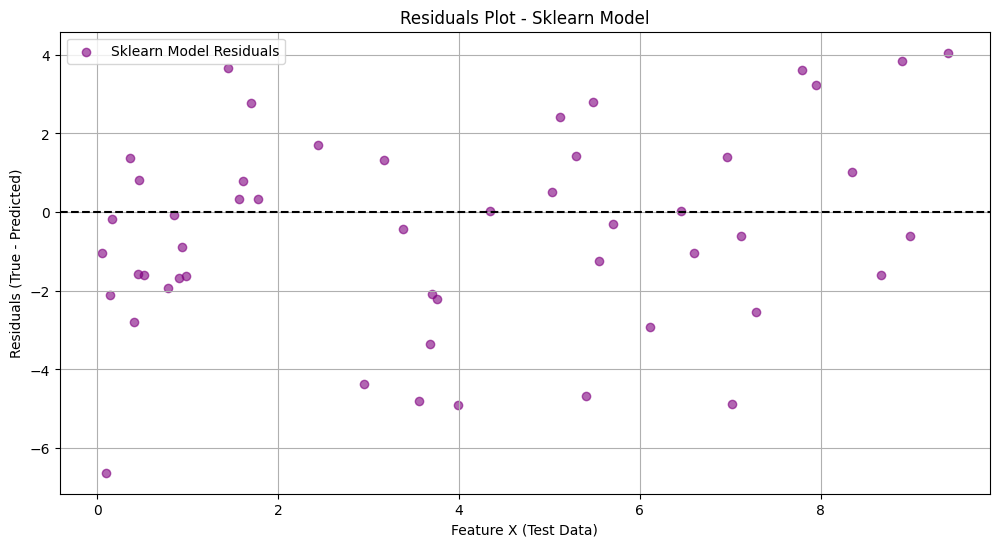

Analysis:
The Scikit-learn model performed better!


In [ ]:
#Before running this cell ensure that you have Executed the first cell

# Generate Linear data
X, y = generate_linear_data(n_samples=200, noise=2.0)

# Handle missing data (if present)
X = handle_missing_data(X)

# Custom train-test split
X_train, X_test, y_train, y_test = custom_train_test_split(X, y, test_size=0.25, random_state=42)

# Train custom model
custom_model = CustomGradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
custom_model.fit(X_train, y_train)

# Train sklearn model
sklearn_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
sklearn_model.fit(X_train, y_train)

# Evaluate models
evaluate_model(custom_model, sklearn_model, X_test, y_test)

## Test-2
- Testing both custom and SKlearn model on noisy generated data 

Iteration 1/100, Loss: 26.8436
Iteration 2/100, Loss: 22.3473
Iteration 3/100, Loss: 18.7052
Iteration 4/100, Loss: 15.7212
Iteration 5/100, Loss: 13.2911
Iteration 6/100, Loss: 11.3284
Iteration 7/100, Loss: 9.7300
Iteration 8/100, Loss: 8.4363
Iteration 9/100, Loss: 7.3840
Iteration 10/100, Loss: 6.5320
Iteration 11/100, Loss: 5.8351
Iteration 12/100, Loss: 5.2722
Iteration 13/100, Loss: 4.8104
Iteration 14/100, Loss: 4.4330
Iteration 15/100, Loss: 4.0982
Iteration 16/100, Loss: 3.8436
Iteration 17/100, Loss: 3.6156
Iteration 18/100, Loss: 3.4342
Iteration 19/100, Loss: 3.2597
Iteration 20/100, Loss: 3.1168
Iteration 21/100, Loss: 3.0042
Iteration 22/100, Loss: 2.9054
Iteration 23/100, Loss: 2.8269
Iteration 24/100, Loss: 2.7443
Iteration 25/100, Loss: 2.6758
Iteration 26/100, Loss: 2.6058
Iteration 27/100, Loss: 2.5547
Iteration 28/100, Loss: 2.4959
Iteration 29/100, Loss: 2.4509
Iteration 30/100, Loss: 2.4144
Iteration 31/100, Loss: 2.3743
Iteration 32/100, Loss: 2.3457
Iteration 3

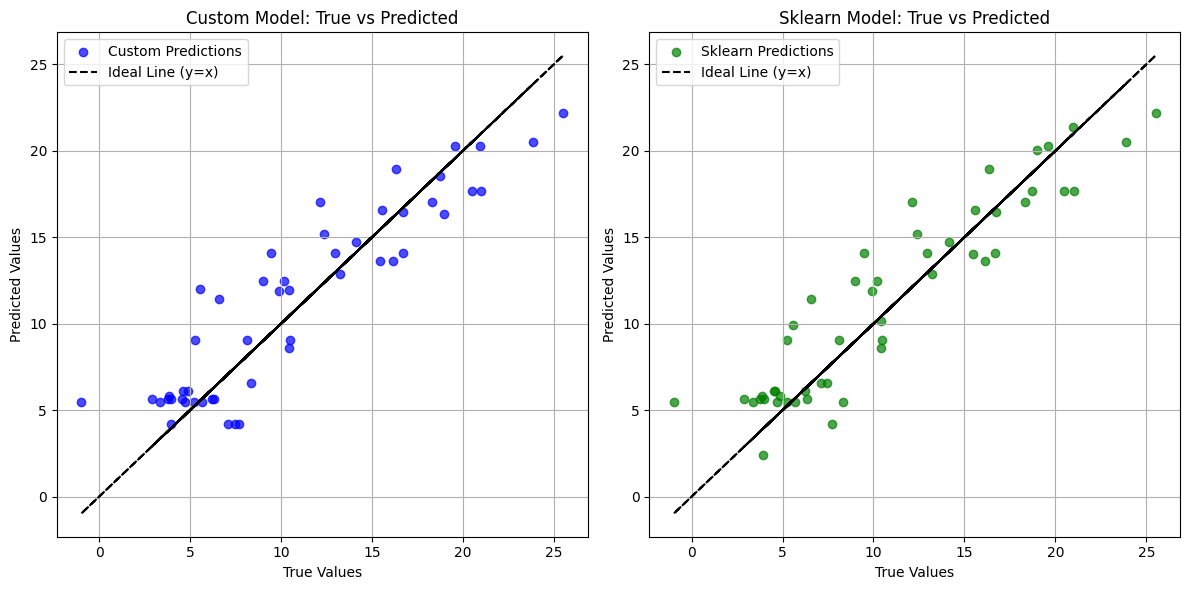


Custom Model Performance:
Mean Squared Error: 6.8906
R-Squared: 0.8259

Sklearn Model Performance:
Mean Squared Error: 6.0692
R-Squared: 0.8466


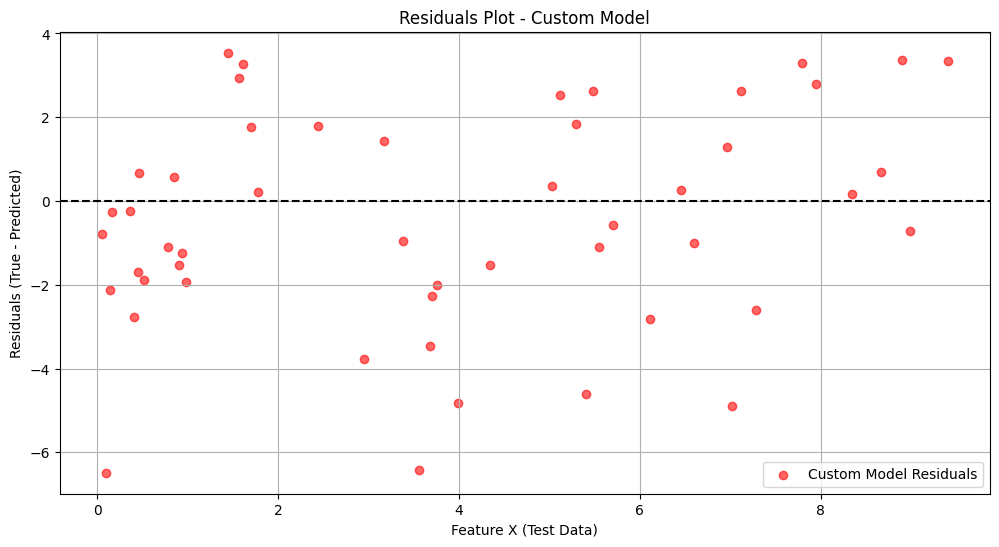

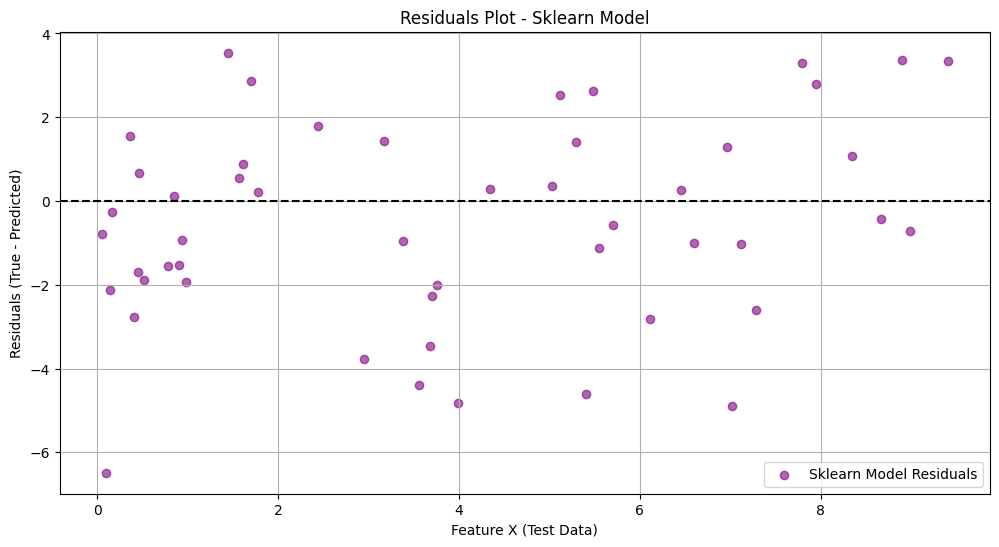

Analysis:
The Scikit-learn model performed better!


In [20]:
# Generate Noisy data
X, y = generate_noisy_data(n_samples=200, noise=2.0)

# Handle missing data (if present)
X = handle_missing_data(X)

# Custom train-test split
X_train, X_test, y_train, y_test = custom_train_test_split(X, y, test_size=0.25, random_state=42)

# Train custom model
custom_model = CustomGradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
custom_model.fit(X_train, y_train)

# Train sklearn model
sklearn_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
sklearn_model.fit(X_train, y_train)

# Evaluate models
evaluate_model(custom_model, sklearn_model, X_test, y_test)

## Test-3
- Testing both custom and SKlean model on polynomial generated data

Iteration 1/100, Loss: 415.9947
Iteration 2/100, Loss: 338.4194
Iteration 3/100, Loss: 275.3606
Iteration 4/100, Loss: 224.2216
Iteration 5/100, Loss: 182.6294
Iteration 6/100, Loss: 148.9348
Iteration 7/100, Loss: 121.5232
Iteration 8/100, Loss: 99.1525
Iteration 9/100, Loss: 80.9827
Iteration 10/100, Loss: 66.2510
Iteration 11/100, Loss: 54.2763
Iteration 12/100, Loss: 44.5413
Iteration 13/100, Loss: 36.6163
Iteration 14/100, Loss: 30.1824
Iteration 15/100, Loss: 24.9158
Iteration 16/100, Loss: 20.6520
Iteration 17/100, Loss: 17.1730
Iteration 18/100, Loss: 14.3475
Iteration 19/100, Loss: 12.0421
Iteration 20/100, Loss: 10.1708
Iteration 21/100, Loss: 8.6430
Iteration 22/100, Loss: 7.3989
Iteration 23/100, Loss: 6.3921
Iteration 24/100, Loss: 5.5662
Iteration 25/100, Loss: 4.8953
Iteration 26/100, Loss: 4.3495
Iteration 27/100, Loss: 3.9069
Iteration 28/100, Loss: 3.5459
Iteration 29/100, Loss: 3.2525
Iteration 30/100, Loss: 3.0079
Iteration 31/100, Loss: 2.8090
Iteration 32/100, Los

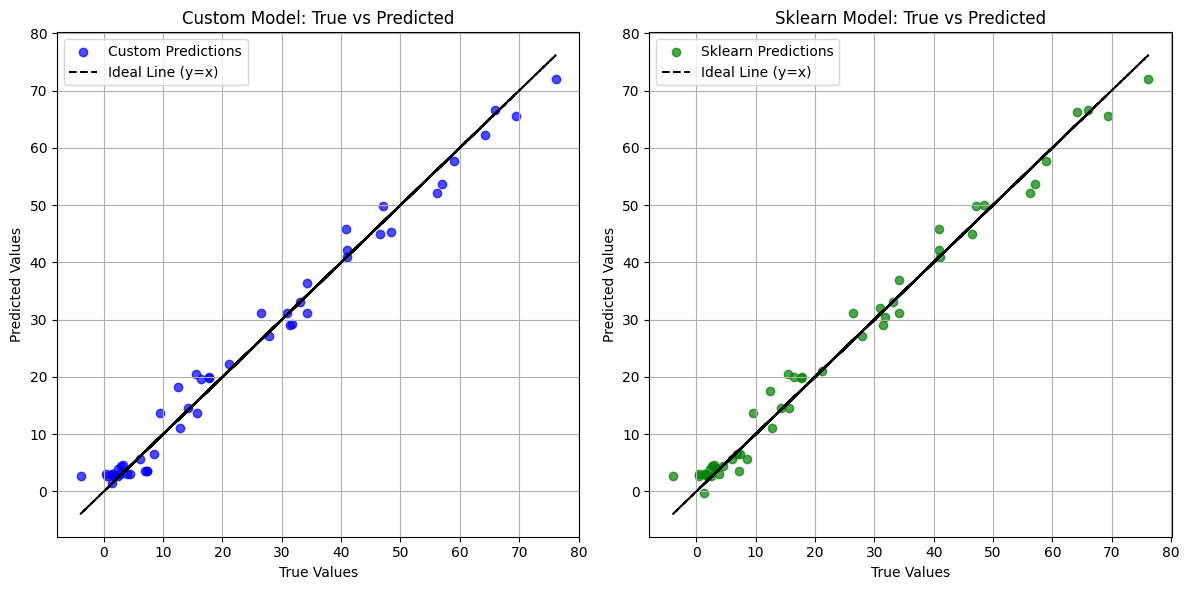


Custom Model Performance:
Mean Squared Error: 7.5595
R-Squared: 0.9841

Sklearn Model Performance:
Mean Squared Error: 6.8193
R-Squared: 0.9856


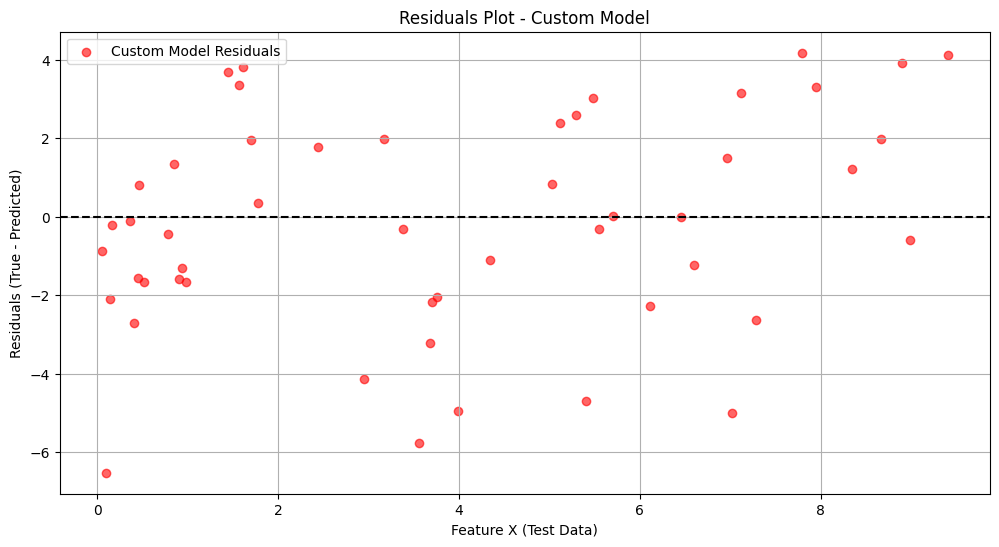

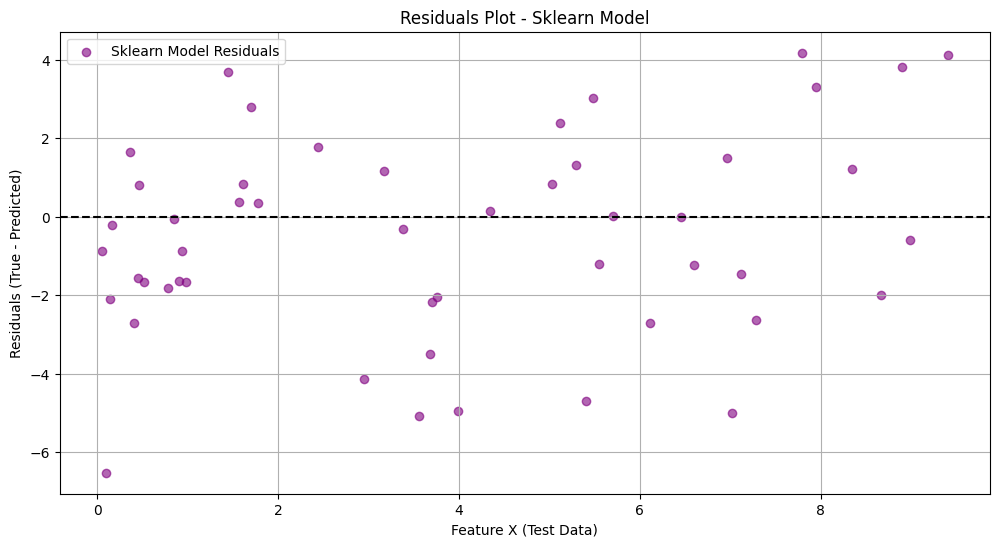

Analysis:
The Scikit-learn model performed better!


In [21]:
# Generate Polynomial data
X, y = generate_polynomial_data(n_samples=200, noise=2.0)

# Handle missing data (if present)
X = handle_missing_data(X)

# Custom train-test split
X_train, X_test, y_train, y_test = custom_train_test_split(X, y, test_size=0.25, random_state=42)

# Train custom model
custom_model = CustomGradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
custom_model.fit(X_train, y_train)

# Train sklearn model
sklearn_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
sklearn_model.fit(X_train, y_train)

# Evaluate models
evaluate_model(custom_model, sklearn_model, X_test, y_test)

## Test-4
- An example usage on how we can use this model for a CSV file (Considering the file to be present in the directory)

C:\Users\NAVEED\AppData\Local\Temp\ipykernel_8256\3486327811.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)


Iteration 1/25, Loss: 426.4952
Iteration 2/25, Loss: 355.2171
Iteration 3/25, Loss: 297.5956
Iteration 4/25, Loss: 246.9453
Iteration 5/25, Loss: 204.8729
Iteration 6/25, Loss: 168.2329
Iteration 7/25, Loss: 138.4560
Iteration 8/25, Loss: 114.2709
Iteration 9/25, Loss: 94.6602
Iteration 10/25, Loss: 78.5620
Iteration 11/25, Loss: 65.2980
Iteration 12/25, Loss: 54.3881
Iteration 13/25, Loss: 45.4158
Iteration 14/25, Loss: 38.9591
Iteration 15/25, Loss: 32.7409
Iteration 16/25, Loss: 27.2538
Iteration 17/25, Loss: 22.7718
Iteration 18/25, Loss: 19.0138
Iteration 19/25, Loss: 16.2402
Iteration 20/25, Loss: 13.8283
Iteration 21/25, Loss: 12.0028
Iteration 22/25, Loss: 10.0964
Iteration 23/25, Loss: 8.5502
Iteration 24/25, Loss: 7.2539
Iteration 25/25, Loss: 6.2709


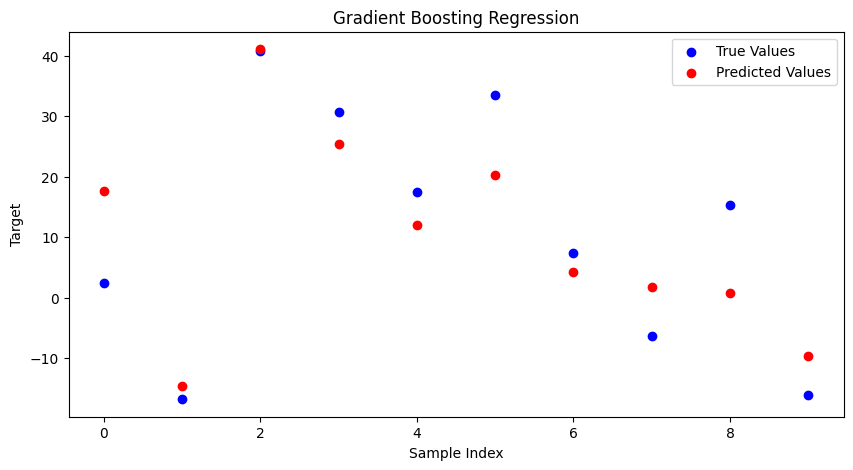

Mean Squared Error: 80.2701


In [23]:
def load_and_preprocess_data(filepath):
    """
    Loads a CSV file and handles missing values.
    - Missing numeric values are filled with the mean of the column.
    - Missing categorical values are filled with the mode of the column.
    Returns: X (features), y (target)
    """
    data = pd.read_csv(filepath)
    # Handle missing values
    for column in data.columns:
        if np.issubdtype(data[column].dtype, np.number):
            data[column].fillna(data[column].mean(), inplace=True)
        else:
            data[column].fillna(data[column].mode()[0], inplace=True)

    # Assume the last column is the target
    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values
    return X, y


# File path for the CSV file
filepath = "../small_test.csv"  # Assuming the file exists in the directory

# Load and preprocess the data
X, y = load_and_preprocess_data(filepath)

# Split data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Train Gradient Boosting Regressor
gbr = CustomGradientBoostingRegressor(n_estimators=25, learning_rate=0.1, max_depth=3)
gbr.fit(X_train, y_train)

# Make predictions
y_pred = gbr.predict(X_test)

# Plot results
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_test)), y_test, label="True Values", color="blue")
plt.scatter(range(len(y_pred)), y_pred, label="Predicted Values", color="red")
plt.xlabel("Sample Index")
plt.ylabel("Target")
plt.title("Gradient Boosting Regression")
plt.legend()
plt.show()


# Evaluate model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
